# Feature Representation Extraction of Paintings Using VGG16

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img, smart_resize
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import cv2
import pickle

# List the images in the specified directory
index = os.listdir('C:/art/impressionism/')
index_list = [f'C:/art/impressionism/{i}' for i in index]

# Load the pre-trained VGG16 model and configure it for transfer learning
vgg16 = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False

# Create a sequential model with VGG16 and GlobalAveragePooling2D
model = Sequential([
        vgg16,
        GlobalAveragePooling2D()
        ])

# Initialize a list to store predictions for each image
index_predict = []

# Extract feature representation for each image and store them in index_predict
for i in index_list:
    img = load_img(i)
    y = img_to_array(img)
    y = tf.image.resize(img,[224,224]) 
    y = np.array([y]) 
    feature = model.predict(y, verbose=0) # verbose=0 : To not show the prgress in the output
    index_predict.append(feature)

In [62]:
# Display the length of index_predict
len(index_predict)

3396

<br>

## Save and Load the index_predict File

In [63]:
import pickle

file = open("C:/data/averagepooling.txt","wb")
pickle.dump(index_predict, file)
file.close()

In [2]:
import pickle

file = open("C:/data/averagepooling.txt","rb")
index_predict = pickle.load(file)
file.close()

<br>

## Find the Most Similar Image of the Test Image by Drawing Style

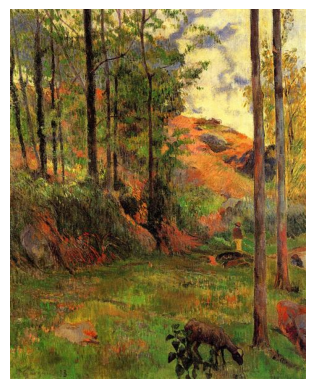

In [65]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
test_img = 'C:/art/pure/post_impressionism/pi_523.jpg'
img = cv2.imread(test_img)

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

- Above is the test image

In [66]:
# Load a new test image
img = load_img(test_img)

# Preprocess the test image and extract its feature representation 
x = img_to_array(img)
x = tf.image.resize(x,[224,224])
x = np.array([x]) 
feature = model.predict(x) 

# Compute cosine similarities between the new image and all indexed images
similarities = []

for i in index_predict:
    similarities.append(cosine_similarity(feature, i))

1/1 [==============================] - 1s 749ms/step


In [67]:
similarities[0:5]

[array([[0.36112234]], dtype=float32),
 array([[0.46352854]], dtype=float32),
 array([[0.44653493]], dtype=float32),
 array([[0.47677052]], dtype=float32),
 array([[0.4091012]], dtype=float32)]

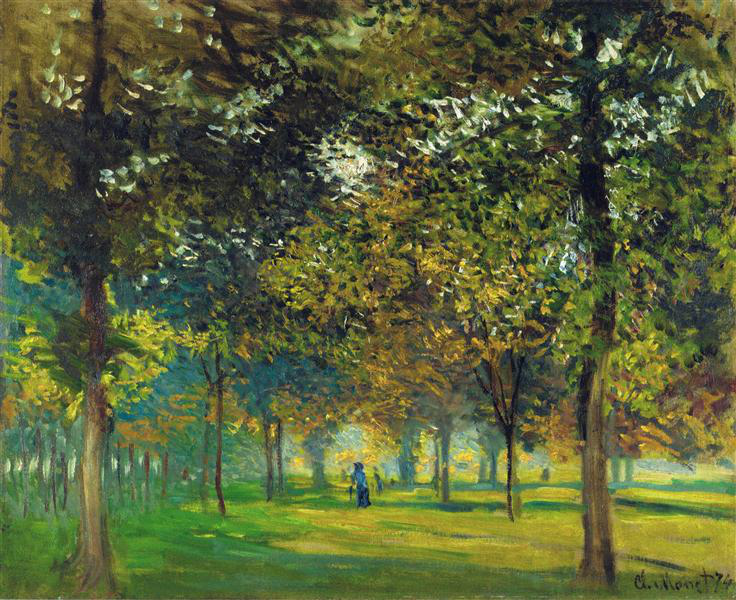

In [68]:
# Find the most similar image based on cosine similarity    
sim_img = index_list[np.argmax(np.array(similarities))]

# Display the most similar image
load_img(sim_img)

- Above is the most similar image to the test image

<br>

# Cosine Similarity Graph 

1/1 [==============================] - 0s 113ms/step


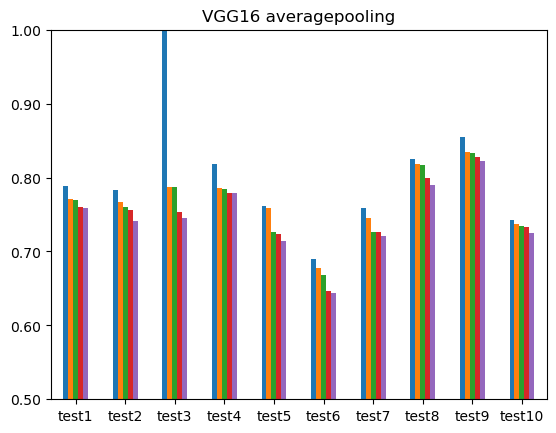

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential


# Load the pre-trained VGG16 model and configure it for transfer learning
vgg16 = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False

# Create a sequential model with VGG16 and GlobalAveragePooling2D
model = Sequential([
        vgg16,
        GlobalAveragePooling2D()
        ])

# Create a DataFrame to store cosine similarity scores
data = pd.DataFrame()

# Compute cosine similarity scores for a range of test images
for i in range(1,11):
    # Load each test image from the specified path
    img = load_img(f"c:/data/test{i}.jpg")
    
    # Convert the image to an array and preprocess
    x = img_to_array(img)
    x = tf.image.resize(x, [224, 224])
    x = np.array([x]) 
    
    # Extract feature representation for the test image
    feature = model.predict(x)

    # List to store the cosine similarities between the test image and indexed images
    similarities = []
    
    # Calculate cosine similarity scores between the current test image and all images in the index
    for j in index_predict:
        similarities.append(cosine_similarity(feature, j))
        
    # Flatten the similarities array
    sim = np.array(similarities).reshape(-1,) 

    # Sort the similarity scores in descending order and pick the top 5 scores
    # This step essentially identifies the top 5 images most similar to the current test image
    data[f'test{i}'] = np.sort(sim)[::-1][:5]  

# Transpose the DataFrame for better readability
data = data.T

ax = data.plot(kind='bar') # Create a bar plot of the similarity scores for each test image
ax.set_title("VGG16 averagepooling") # Set the title for the plot
ax.set_xticklabels(data.index, rotation=0) # Set x-axis tick labels with no rotation for better readability
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.2f}")) # Format the y-axis labels to show numbers with two decimal places
plt.ylim([0.5, 1]) # Set y-axis limits to zoom into the range where similarity scores are significant
ax.get_legend().remove() # Remove the legend
plt.show() # Display the plot

**Note** : 

- In cosine similarity, a value closer to one indicates higher similarity
- Conversely, in Euclidean distance, a smaller value signifies greater similarity

# Display All Test Images and Their Similar Images by Drawing Style

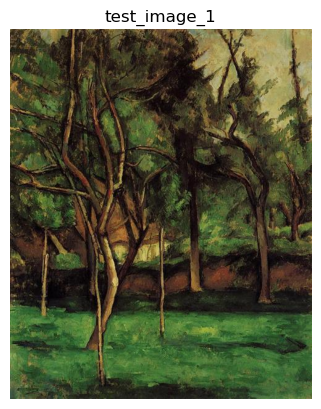

1/1 [==============================] - 0s 116ms/step


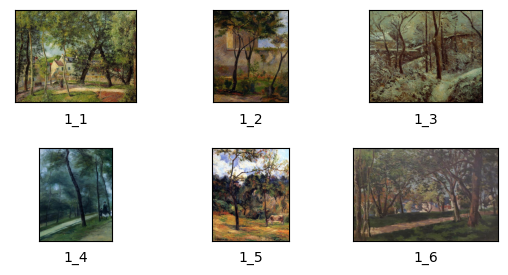

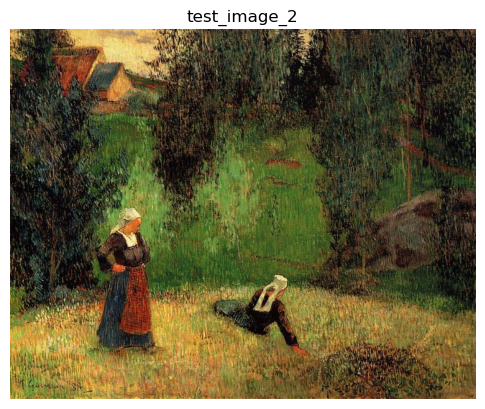

1/1 [==============================] - 0s 129ms/step


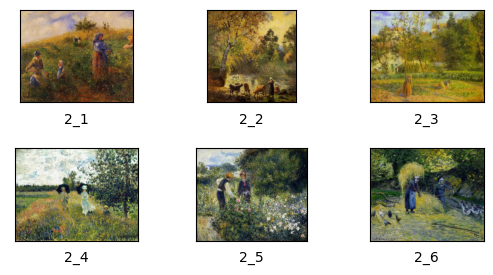

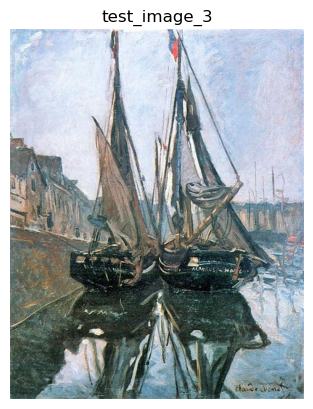

1/1 [==============================] - 0s 121ms/step


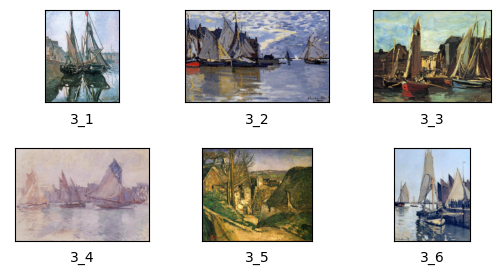

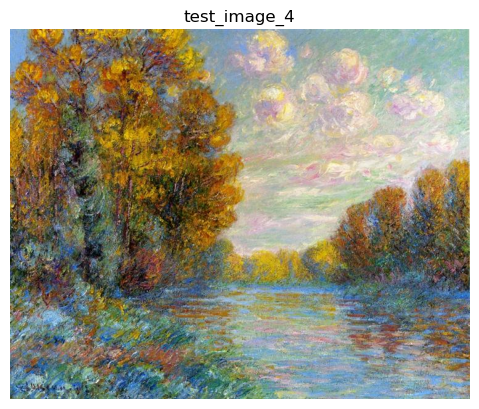

1/1 [==============================] - 0s 120ms/step


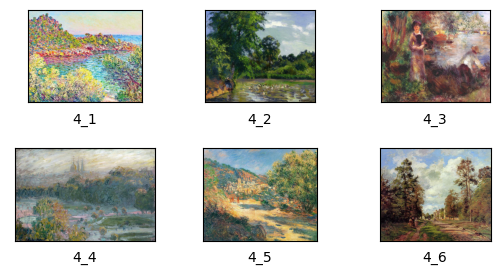

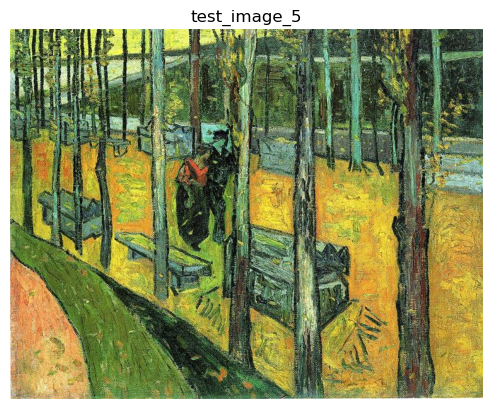

1/1 [==============================] - 0s 119ms/step


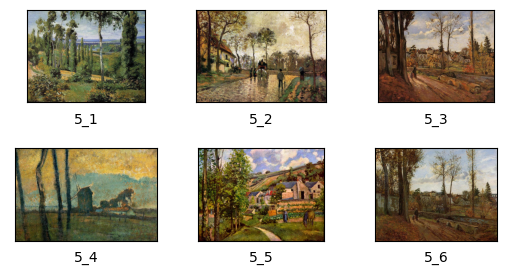

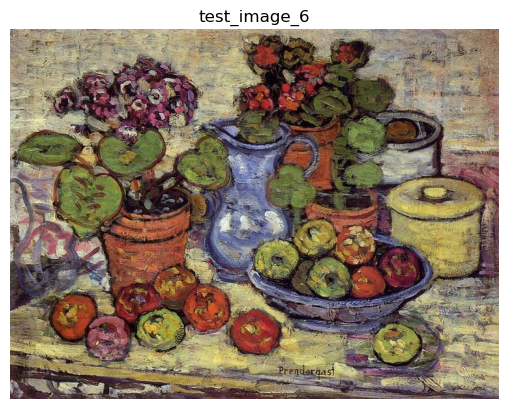

1/1 [==============================] - 0s 115ms/step


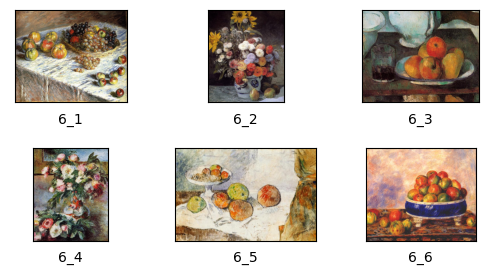

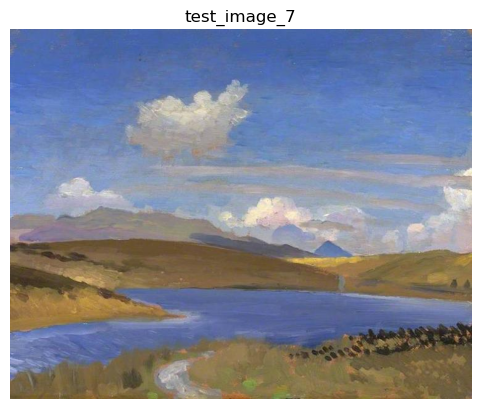

1/1 [==============================] - 0s 118ms/step


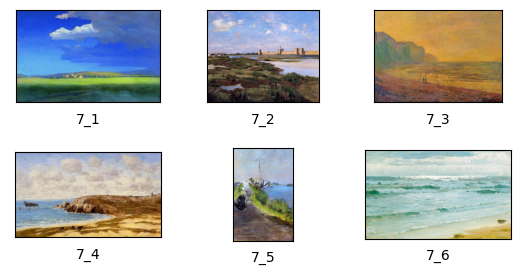

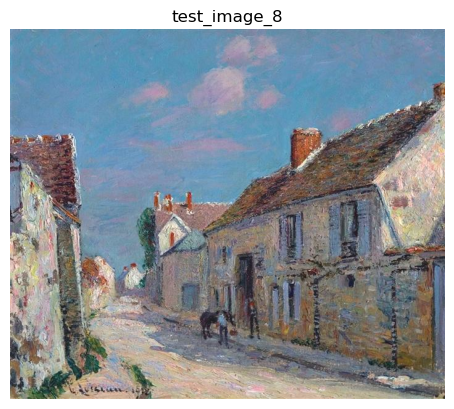

1/1 [==============================] - 0s 115ms/step


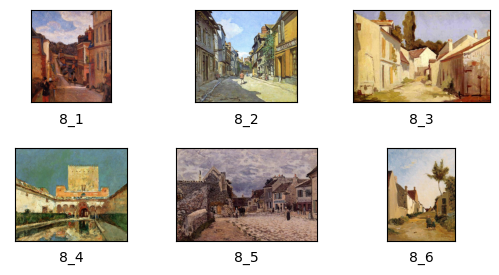

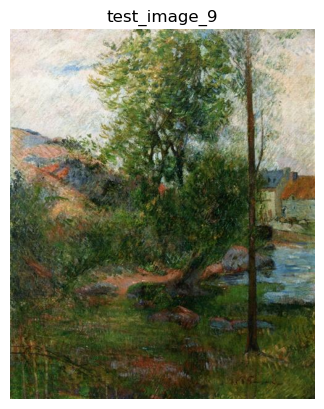

1/1 [==============================] - 0s 120ms/step


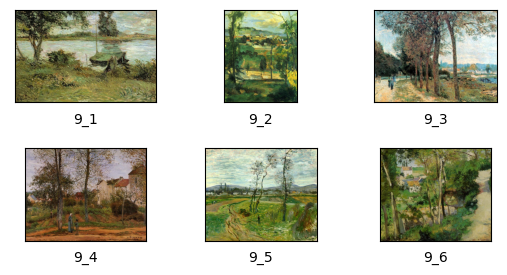

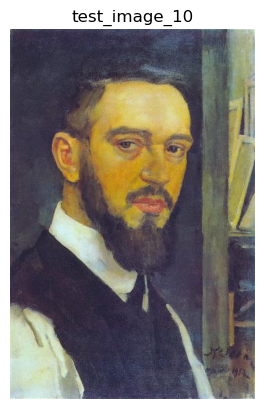

1/1 [==============================] - 0s 119ms/step


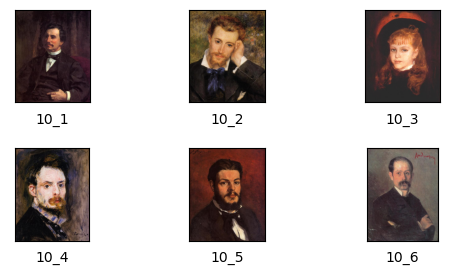

In [18]:
import cv2
import os

index = os.listdir('C:/art/impressionism/')
index_list = [f'C:/art/impressionism/{i}' for i in index]

# Loop over the test images numbered from 1 to 10
for n in range(1, 11):
    
    # Load and display the test image using OpenCV
    img = cv2.imread(f'C:/data/test{n}.jpg')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'test_image_{n}')
    plt.axis('off')
    plt.show()
    
    # Compute cosine similarity for the test image with indexed images
    
    # Load the test image using Keras utilities
    img1 = load_img(f'C:/data/test{n}.jpg')
    x = img_to_array(img1)
    
    # Resize the image to the input shape expected by the model (224x224)
    x = tf.image.resize(x, [224, 224])
    x = np.array([x])
    
    # Extract feature representation for the test image
    feature = model.predict(x)
    
    # List to store cosine similarities between the test image and indexed images
    similarities = []
    
    # Calculate cosine similarity scores between the current test image and all indexed images
    for i in index_predict:
        similarities.append(cosine_similarity(feature, i))

    # Flatten the similarities list to a 1D array
    x = np.array(similarities).reshape(-1,)
    
    # Display the most similar images based on the cosine similarity scores
    
    # Create a new figure to display similar images
    fig = plt.figure() 
    rows = 3
    cols = 3
    i = 1
    
    # Labels for the subplots
    xlabels = ["xlabel", "1", "2", "3", "4", "5", '6']
    
    # Get the indexes of the top 6 most similar images
    for j in np.argsort(x)[::-1][:6]:
        
        # Load the similar image using its index
        img = cv2.imread(index_list[j]) # index_list was created all the way on the top
        
        # Add the image as a subplot to the figure
        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        # Add a label to the subplot and remove axis ticks for clarity
        ax.set_xlabel(f'{n}_{i}')
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Adjust spacing between subplots
        plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

        
        # Increment the subplot number
        i += 1
     
    # Display the figure with similar images
    plt.show()